In [95]:
import os
DATA_DIR = 'txtfile'
fname = 'Anne of Green Gables uc1.31822027365162-1560306308.txt'
fname = os.path.join(DATA_DIR, fname)
with open(fname, encoding='utf-8') as f:
    text = f.read()
from string import punctuation
no_punct = ''.join([ch for ch in text if ch not in punctuation])
lower_text=no_punct.lower()

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(lower_text) 
  
clean_text = [w for w in word_tokens if not w in stop_words] 
  
clean_text = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        clean_text.append(w) 

stop=['“', '”','’','—']
filtered_word = [w for w in clean_text if not w in stop]

filtered_word = []

for w in clean_text: 
    if w not in stop: 
        filtered_word.append(w) 
        
print(filtered_word)

['anne', 'green', 'gables', '–0–', 'chapter', 'mrs', 'rachel', 'lynde', 'surprised', 'mrs', 'rachel', 'lynde', 'lived', 'avonlea', 'main', 'road', 'dipped', 'little', 'hollow', 'fringed', 'quiet', 'pool', 'cascade', 'reached', 'lyndes', 'hollow', 'wellconducted', 'little', 'stream', 'even', 'time', 'woods', 'dark', 'secrets', 'earlier', 'course', 'brook', 'intri', 'headlong', 'cate', 'reputed', 'old', 'cuthbert', 'place', 'alders', 'ladies', 'eardrops', 'traversed', 'brook', 'source', 'away', 'back', 'woods', 'due', 'regard', 'decency', 'decorum', 'prob', 'brook', 'could', 'run', 'past', 'mrs', 'rachel', 'lyndes', 'door', 'ably', 'conscious', 'mrs', 'rachel', 'sitting', 'sharp', 'eye', 'everything', 'window', 'keeping', 'brooks', 'children', 'place', 'would', 'never', 'noticed', 'anything', 'odd', 'l', 'passed', 'anne', 'green', 'gables', 'rest', 'ferreted', 'whys', 'fores', 'thereof', 'neighbours', 'busi', 'neglecting', 'mrs', 'rachel', 'dint', 'lynde', 'one', 'ness', 'attend', 'close

In [96]:
from collections import Counter
freq = Counter(filtered_word)
freq.most_common

<bound method Counter.most_common of Counter({'anne': 1341, 'marilla': 779, 'said': 642, 'mrs': 415, 'diana': 388, 'would': 345, 'matthew': 340, 'green': 326, 'think': 308, 'well': 298, 'little': 294, 'one': 294, 'like': 292, 'gables': 285, 'never': 282, 'oh': 275, 'know': 257, 'dont': 239, 'go': 234, 'good': 230, 'going': 224, 'could': 223, 'much': 217, 'time': 182, 'ever': 181, 'girl': 174, 'see': 173, 'back': 169, 'say': 161, 'must': 155, 'miss': 155, 'came': 154, 'went': 153, 'thought': 152, 'things': 146, 'mr': 146, 'school': 145, 'home': 143, 'lynde': 142, 'get': 141, 'eyes': 141, 'thing': 135, 'says': 133, 'come': 131, 'im': 130, 'white': 129, 'look': 124, 'right': 123, 'tell': 121, 'made': 120, 'got': 120, 'really': 118, 'didnt': 117, 'barry': 117, 'night': 116, 'hair': 115, 'told': 113, 'make': 111, 'always': 109, 'long': 109, 'isnt': 109, 'gilbert': 107, 'felt': 106, 'feel': 106, 'girls': 106, 'old': 105, 'away': 105, 'last': 104, 'take': 101, 'new': 100, 'day': 99, 'somethin

In [97]:
from nltk.probability import FreqDist
Fdist = FreqDist(filtered_word)
print(Fdist)

<FreqDist with 9039 samples and 55320 outcomes>


In [98]:
Fdist['anne']

1341

In [100]:
Fdist['anne']/len(word_tokens)*100

1.1615216713439351

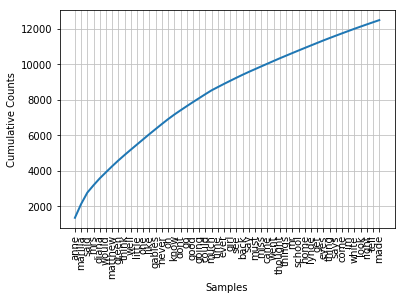

In [101]:
Fdist.plot(50, cumulative=True)

In [104]:
filtered_text=' '.join(filtered_word)

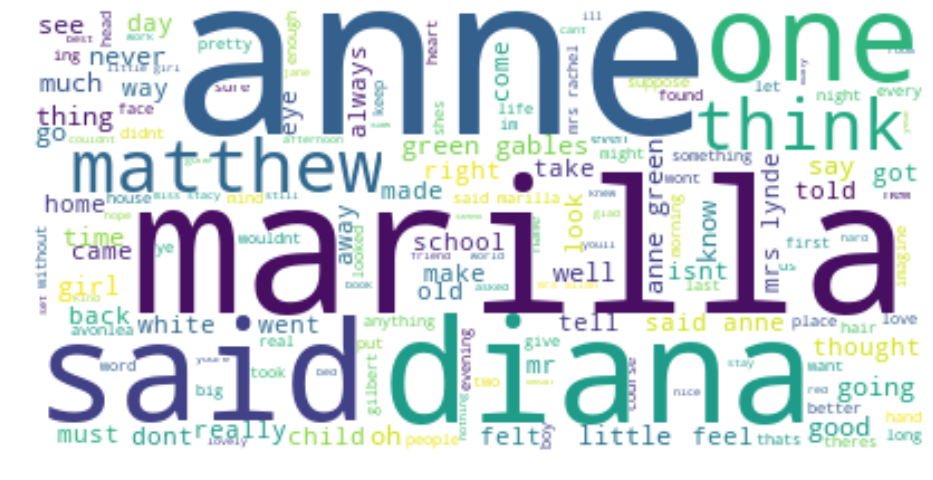

In [105]:
import os
os.path
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
wordcloud = WordCloud(max_words=150,background_color="white").generate(filtered_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [113]:
wordcloud.to_file("txtfile/Anne of Green Gable.png")

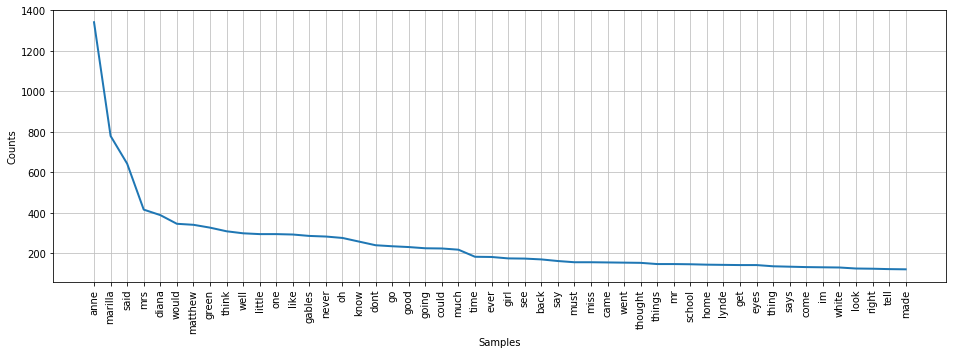

In [123]:
from matplotlib import pyplot as plt
import nltk
freqdist = nltk.FreqDist(filtered_word)
plt.figure(figsize=(16,5))

plt.savefig ("txtfile/Anne of Green Gable_graph.png")
freqdist.plot(50)
plt.show()


In [122]:
lexical_diversity = len(set(word_tokens)) / len(word_tokens)
lexical_diversity

0.07960018016145237

In [31]:
len(set(word_tokens))

9190

In [32]:
len(word_tokens)

115452

In [33]:
import nltk
from nltk import pos_tag
nltk.pos_tag(freq)

[('anne', 'NN'),
 ('green', 'JJ'),
 ('gables', 'NNS'),
 ('–0–', 'VBP'),
 ('chapter', 'NN'),
 ('mrs', 'NN'),
 ('rachel', 'NN'),
 ('lynde', 'NN'),
 ('surprised', 'VBD'),
 ('lived', 'JJ'),
 ('avonlea', 'NN'),
 ('main', 'JJ'),
 ('road', 'NN'),
 ('dipped', 'VBD'),
 ('little', 'JJ'),
 ('hollow', 'JJ'),
 ('fringed', 'VBD'),
 ('quiet', 'JJ'),
 ('pool', 'NN'),
 ('cascade', 'NN'),
 ('reached', 'VBD'),
 ('lyndes', 'NNS'),
 ('wellconducted', 'VBN'),
 ('stream', 'RB'),
 ('even', 'RB'),
 ('time', 'NN'),
 ('woods', 'NNS'),
 ('dark', 'JJ'),
 ('secrets', 'NNS'),
 ('earlier', 'RBR'),
 ('course', 'NN'),
 ('brook', 'NN'),
 ('intri', 'NN'),
 ('headlong', 'JJ'),
 ('cate', 'NN'),
 ('reputed', 'VBD'),
 ('old', 'JJ'),
 ('cuthbert', 'JJ'),
 ('place', 'NN'),
 ('alders', 'NNS'),
 ('ladies', 'NNS'),
 ('eardrops', 'VBP'),
 ('traversed', 'VBN'),
 ('source', 'NN'),
 ('away', 'RB'),
 ('back', 'RB'),
 ('due', 'JJ'),
 ('regard', 'NN'),
 ('decency', 'NN'),
 ('decorum', 'NN'),
 ('prob', 'NN'),
 ('could', 'MD'),
 ('run', '

In [34]:
[len(w) for w in word_tokens] 

[4,
 2,
 5,
 6,
 3,
 7,
 1,
 3,
 6,
 5,
 2,
 9,
 3,
 6,
 5,
 5,
 4,
 5,
 3,
 7,
 4,
 4,
 6,
 4,
 4,
 1,
 6,
 6,
 7,
 5,
 2,
 2,
 2,
 7,
 4,
 3,
 7,
 2,
 7,
 6,
 6,
 3,
 13,
 6,
 6,
 3,
 3,
 4,
 3,
 4,
 2,
 2,
 5,
 5,
 4,
 4,
 7,
 3,
 2,
 3,
 7,
 6,
 1,
 5,
 5,
 1,
 8,
 4,
 3,
 7,
 2,
 3,
 3,
 8,
 5,
 2,
 2,
 2,
 3,
 4,
 6,
 3,
 6,
 8,
 3,
 9,
 2,
 1,
 5,
 4,
 3,
 6,
 4,
 4,
 3,
 5,
 4,
 3,
 3,
 6,
 3,
 7,
 3,
 7,
 4,
 2,
 5,
 5,
 3,
 4,
 3,
 6,
 6,
 4,
 1,
 2,
 4,
 3,
 9,
 4,
 3,
 6,
 3,
 7,
 5,
 3,
 2,
 10,
 4,
 3,
 6,
 7,
 4,
 6,
 3,
 8,
 2,
 3,
 4,
 3,
 5,
 3,
 5,
 5,
 7,
 8,
 3,
 3,
 1,
 2,
 2,
 2,
 6,
 4,
 2,
 5,
 6,
 4,
 5,
 3,
 3,
 8,
 3,
 3,
 4,
 3,
 5,
 5,
 7,
 5,
 10,
 4,
 10,
 5,
 3,
 3,
 3,
 6,
 4,
 5,
 3,
 3,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 6,
 7,
 5,
 7,
 9,
 3,
 3,
 6,
 5,
 3,
 8,
 3,
 5,
 2,
 2,
 5,
 3,
 6,
 2,
 6,
 2,
 7,
 3,
 3,
 2,
 5,
 5,
 7,
 9,
 3,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 7,
 1,
 3,
 3,
 2,
 1,
 4,
 3,
 6,
 3,
 6,
 6,
 6,
 3,
 3,
 12,
 3,
 3,
 3,
 9,
 4,
 3,

In [35]:
fdist = FreqDist(len(w) for w in word_tokens) 
print(fdist)
fdist

<FreqDist with 20 samples and 115452 outcomes>


FreqDist({3: 24991, 4: 23183, 2: 18331, 5: 12742, 1: 11864, 6: 8546, 7: 7551, 8: 3568, 9: 2162, 10: 1247, ...})

In [36]:
fdist.most_common()

[(3, 24991),
 (4, 23183),
 (2, 18331),
 (5, 12742),
 (1, 11864),
 (6, 8546),
 (7, 7551),
 (8, 3568),
 (9, 2162),
 (10, 1247),
 (11, 693),
 (12, 328),
 (13, 142),
 (14, 74),
 (15, 18),
 (16, 6),
 (17, 3),
 (22, 1),
 (18, 1),
 (19, 1)]

In [67]:
fdist.freq(fdist.max())

0.21607064624477068

In [37]:
len(text.split())

109787

In [38]:
import re
parts = [len(l.split()) for l in re.split(r'[?!.]', text) if l.strip()]

print(sum(parts)/len(parts))

14.592816734640179
